In [48]:
#-*- encoding: utf8 -*-
import os
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy
import csv

In [49]:
# 피험자를 선택하여 데이터 불러오는 함수
def select_subject(_subject):
    path = 'C:\Users\user\Downloads\iDAQ-400\Software\iDAQ400\Data\ASCII_data\\' + subject
#     print(path)
    _listOfData= [path+'\\' +_subject + '_ref.txt',
                  path+'\\' +_subject + '_calm.txt',
                  path+'\\' +_subject + '_horror.txt',
                  path+'\\' +_subject + '_happy.txt',
                  path+'\\' +_subject + '_sad.txt']
    
    return _listOfData

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-49-1a3361d07088>, line 3)

In [37]:
# 전처리 함수(lowpass&highpass filter)
def preprocessing(hrdata):
    filtered = hp.filter_signal(hrdata, cutoff = 3.0, sample_rate = 500.0, order = 3, filtertype='lowpass')
    filtered = hp.filter_signal(hrdata, cutoff = 0.70, sample_rate = 500.0, order = 3, filtertype='highpass')
    return filtered
# filt = preprocessing(hrList[0])
# print(filt)

In [38]:
# peak 찾는 함수(amplitude)
def detect_peak(hrdata):
    point=scipy.signal.find_peaks(hrdata,distance=200)
#     print(point[0])
    plt.scatter(point[0],hrdata[point[0]])
    plt.plot(hrdata)
    peak=np.zeros(len(point[0]))
    for i in range(len(point[0])):
        peak[i]=(hrdata[point[0][i]])
#     print(peak)
    return(peak,point[0])
# detect_peak(hrdata)

In [39]:
#주기찾는 함수 
def find_period(points, samplingrate):
    # index -> time
    for i in range(len(points)):
        points[i]=float(points[i])/samplingrate
    period=[]
    for i in range(len(points)-1):
        period.append(points[i+1]-points[i])
#     print('period:',period)
    return(period)
# period=find_period(peak)

In [40]:
# 평균 ppi 구하는 함수
def calculate_PPI(periods):
    PPI=0.0;
    for i in range(len(periods)):
        PPI +=periods[i]
    PPI /= len(periods)
    return PPI

In [41]:
# 평균 amplitude 구하는 함수
def calculate_Amplitude(hrpeaks):
    amplitude=0.0;
    for i in range(len(hrpeaks)):
        amplitude +=hrpeaks[i]
    amplitude /= len(hrpeaks)
    return amplitude

In [42]:
# 레퍼런스 대비 변화율 계산하는 함수
def calculate_ChangeRate(ref,x):
    changeRate = (x-ref)/ref
    return changeRate

In [43]:
# 변화율 csv로 출력하는 함수
# output.csv에 변화율 이어쓰기
def write_csv(_subject, list_amp,list_ppi):
    f = open('C:\\Users\\user\\Downloads\\iDAQ-400\\Software\\iDAQ400\\Data\\analysis\\ppg_output.csv', 'a')
    wr = csv.writer(f)
    for i in range(len(list_amp)):
        wr.writerow([_subject + str(i+1), str(list_amp[i]), str(list_ppi[i])])
    f.close()

[0번째]

amplitude: -0.6044522439937439

ppi : -0.0507864421798848

[1번째]

amplitude: -0.24278501718301435

ppi : 0.005033074489502462

[2번째]

amplitude: -0.5392525420612665

ppi : -0.09035755776429594

[3번째]

amplitude: -0.3850260704542899

ppi : 0.005317872850859553



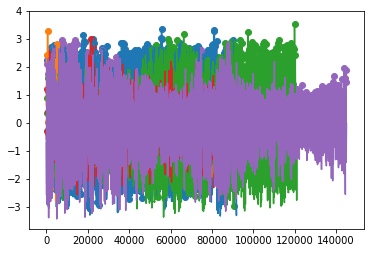

In [44]:
# 데이터 불러오기
# subject에 분석할 피험자 이름 설정하기!
subject='ㅏㅜ'
samplingRate = 500 # 500hz
listOfData = select_subject(subject)

hrList=[0 for i in range(5)]  # ppg raw data
filtered_hrList=[[None] for row in range(5)]
hrpeaks=[[None] for row in range(5)]  # peak amplitudes
hrpoints=[[None] for row in range(5)]  # peak index
hrperiods=[[None] for row in range(5)]  # PPIs
amplitudes=[0 for i in range(5)]  # 영상별 평균 amp리스트
PPIs=[0 for i in range(5)]  # 영상별 평균 ppi리스트
changeRates_amp=[0 for i in range(4)]  # 영상별 amp변화율
changeRates_ppi=[0 for i in range(4)]  # 영상별 ppi변화율

# 레퍼런스 및 영상별 평균 amplitude, ppi 계산
# 0=ref, 1=평온, 2=공포, 3=기쁨, 4=슬픔
for i in range(5):
    hrList[i] = hp.get_data(listOfData[i])
    filtered_hrList[i] = preprocessing(hrList[i])  # low&highpass
    hrpeaks[i],hrpoints[i] = detect_peak(filtered_hrList[i])
    hrperiods[i]=find_period(hrpoints[i],samplingRate)
    amplitudes[i]=calculate_Amplitude(hrpeaks[i])
    PPIs[i]=calculate_PPI(hrperiods[i])
    
# 영상별 레퍼런스 대비 변화율 계산
for i in range(5):
    # ref
    if i==0:
        ref_amplitude = amplitudes[i]
        ref_PPI = PPIs[i]
    else:
        changeRates_amp[i-1]=calculate_ChangeRate(ref_amplitude, amplitudes[i])
        changeRates_ppi[i-1]=calculate_ChangeRate(ref_PPI, PPIs[i])

# 변화율 출력
for i in range(len(changeRates_amp)):
    print('[' + str(i) + '번째]\n' )
    print("amplitude: "+ str(changeRates_amp[i]) + '\n')
    print("ppi : "+ str(changeRates_ppi[i]) + '\n')
    
# 변화율 csv 출력
write_csv(subject,changeRates_amp,changeRates_ppi)
